In [4]:
import sys
sys.path.insert(0,'D:/Python_Code/GANBO/catree')

In [10]:
import os
print(os.getcwd())
os.chdir(r'D:/Python_Code/GANBO/catree/dataset')


/home/share/huadjyin/home/s_huluni/fengboyu/GANBO/catree


FileNotFoundError: [Errno 2] No such file or directory: 'D:/Python_Code/GANBO/catree/dataset'

In [1]:
file_path = "D:/Python_Code/GANBO/catree/dataset/catree_data.h5ad"

In [2]:
import scanpy as sc
import anndata as ad
adata = ad.read_h5ad(file_path)

D:\Anaconda\envs\BGI\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


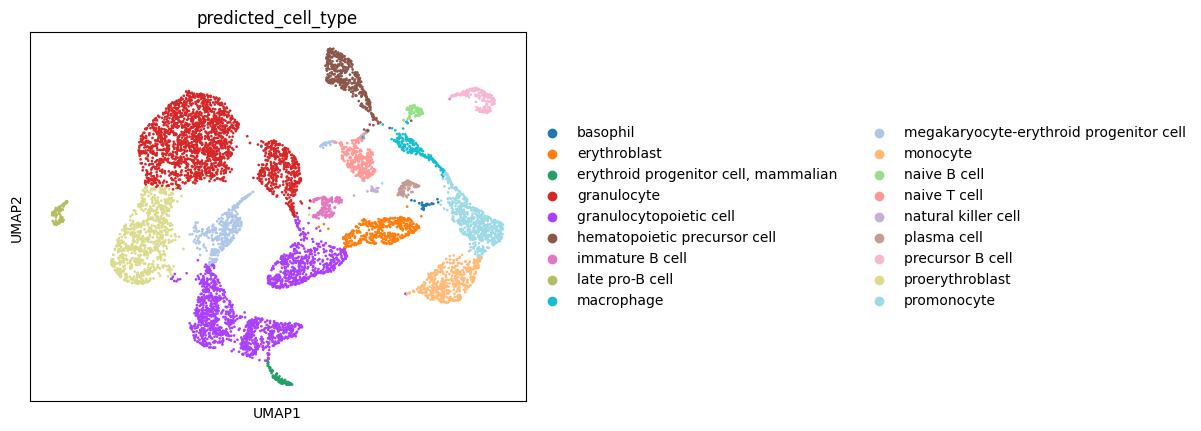

In [3]:
import scanpy as sc
sc.pp.neighbors(adata, use_rep="catree_emb")
sc.tl.umap(adata)
sc.pl.umap(adata, color="predicted_cell_type")

In [4]:
adata.obsm["X_umap"]

array([[23.182789 ,  2.5257576],
       [ 7.381357 ,  9.706908 ],
       [ 9.0399885,  2.5655935],
       ...,
       [ 3.9835978,  3.3535204],
       [ 6.9425364, 11.294159 ],
       [ 5.152837 , -6.8195024]], dtype=float32)

In [5]:
adata.obs.head()

,age,cell,free_annotation,method,donor_id,n_genes,subtissue,n_counts,louvain,leiden,...,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9
index,,,,,,,,,,,,,,,,,,,,,
10X_P7_2_ACGCAGCAGGGCACTA-1,3m,10X_P7_2_ACGCAGCAGGGCACTA,nan,droplet,3-F-56,3605,nan,19649.0,4,3,...,cell,hematopoietic cell,myeloid cell,promonocyte,NaN,NaN,NaN,NaN,NaN,NaN
TTTACTGCAGCTGGCT-1-72-0-0,24m,MACA_24m_M_BM_60_TTTACTGCAGCTGGCT,nan,droplet,24-M-60,661,nan,6643.0,21,26,...,cell,hematopoietic cell,blood cell,granulocyte,NaN,NaN,NaN,NaN,NaN,NaN
ACTATCTGTACCATCA-1-5-1-0,30m,10X_P1_5_ACTATCTGTACCATCA,nan,droplet,30-M-2,1398,BM (NON-STC),8244.0,19,18,...,cell,precursor cell,progenitor cell,myeloid lineage restricted progenitor cell,granulocytopoietic cell,NaN,NaN,NaN,NaN,NaN
TTTGGTTTCTCTGTCG-1-25-0-0,18m,MACA_18m_M_BM_52_TTTGGTTTCTCTGTCG,nan,droplet,18-M-52,2554,nan,12329.0,9,16,...,cell,hematopoietic cell,hematopoietic precursor cell,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TGTCCCAGTACAGTGG-1-73-0-0,24m,MACA_24m_M_BM_61_TGTCCCAGTACAGTGG,nan,droplet,24-M-61,610,nan,3129.0,2,0,...,cell,hematopoietic cell,blood cell,granulocyte,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import numpy as np
cell_type_to_umap = {}

level_columns = [col for col in adata.obs.columns if col.startswith('level_')]

for level in level_columns:
    unique_cell_types = adata.obs[level].unique()
    for cell_type in unique_cell_types:
        bool_indices = adata.obs[level] == cell_type
        int_indices = np.where(bool_indices)[0]
        umap_values = adata.obsm['X_umap'][int_indices]

        if cell_type not in cell_type_to_umap:
            cell_type_to_umap[cell_type] = []

        cell_type_to_umap[cell_type].extend(umap_values.tolist())

first_key = next(iter(cell_type_to_umap)) 
print(f"Key: {first_key}")
print(f"Value: {cell_type_to_umap[first_key]}")



Key: cell
Value: [[23.182788848876953, 2.5257575511932373], [7.381357192993164, 9.706908226013184], [9.03998851776123, 2.5655934810638428], [11.914543151855469, 17.555538177490234], [-2.5656135082244873, 11.930024147033691], [15.936622619628906, 12.369595527648926], [0.1608399897813797, 10.265555381774902], [9.885119438171387, 0.45345911383628845], [12.115965843200684, 19.20748519897461], [10.477714538574219, -1.3895944356918335], [2.992990255355835, 14.689579963684082], [6.813107967376709, 6.691283226013184], [8.495055198669434, 0.08907940238714218], [1.429314374923706, 16.553983688354492], [5.601637363433838, -8.43567180633545], [17.885175704956055, -3.0256805419921875], [19.743852615356445, 7.273361682891846], [-0.3434888422489166, 11.475804328918457], [12.711979866027832, 11.685765266418457], [18.386247634887695, -3.271667242050171], [3.3240349292755127, 3.0641374588012695], [2.5596237182617188, -2.9703617095947266], [7.756032943725586, -6.934860706329346], [0.9853000640869141, 11.

In [6]:
filename = 'D:\Python_Code\GANBO\catree\dataset\cell_type.json'

In [7]:
import json
with open (filename,'r') as f:
    cell_type_map = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Python_Code\\GANBO\\catree\\dataset\\cell_type.json'